# image filtering + plot images + image compression and recovery + DNN using k

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#NZLCC1 = pd.read_csv('/home/j2/Desktop/PythonTry/MLshm/MLRTMwithExperiment/rectx002y006/iter00000/bnzlcc.csv',header=None)

In [2]:
def implt(image):
    plt.imshow(ndimage.rotate(image,90))
    plt.show()

#implt(NZLCC1)

def implt2(Y_train,Y_recovered,index):
    #gs = gridspec.GridSpec(1,2, height_ratios=[1,1])
    #fig = plt.figure()
    plt.figure(figsize=(12, 7))
    ax1 = plt.subplot(121)
    ax1.imshow(ndimage.rotate(Y_train[index,:].reshape(401,401),90))
    plt.title("Original", fontsize=16)
    ax2 = plt.subplot(122)
    ax2.imshow(ndimage.rotate(Y_recovered[index,:].reshape(401,401),90))
    plt.title("Compressed", fontsize=16)
    plt.show()

def implt3(Y_train,Y_recovered,idx,idy):
    #gs = gridspec.GridSpec(1,2, height_ratios=[1,1])
    #fig = plt.figure()
    index=dfX.index[(dfX['x (mm)'] == idx) & (dfX['y (mm)'] == idy)]
    plt.figure(figsize=(8, 5))
    ax1 = plt.subplot(121)
    ax1.imshow(ndimage.rotate(Y_train[index,:].reshape(401,401),90))
    plt.title("Original", fontsize=16)

    ax2 = plt.subplot(122)
    ax2.imshow(ndimage.rotate(Y_recovered.reshape(401,401),90))
    plt.title("Predicted", fontsize=16)
     
    plt.show()
    
    

# define the width and length arrays 

rect_spc_x=0.001;
rect_spc_y=0.001;

rect_array_x = np.zeros(54)
rect_array_y = np.zeros(54)

for ix in range(54):
    rect_array_x[ix]=(rect_spc_x*(ix+1))/2

for iy in range(54):
    rect_array_y[iy]=(rect_spc_y*(iy+1))/2

    
plt.plot(range(54),rect_array_x,'.')
#plt.show()

In [3]:
thold = 0.015


file_nametxt ='iput/matrix2DLong%04d.txt' % (thold*1000)
file_nametxtx ='iput/mx%04d.txt' % (thold*1000)
file_nametxty ='iput/my%04d.txt' % (thold*1000)

image2DLong = np.loadtxt(file_nametxt)
X = np.loadtxt(file_nametxtx)
Y = np.loadtxt(file_nametxty)






In [4]:
df = pd.read_csv('sumValuesThrhPer20.csv')
dfX = df[['x (mm)','y (mm)']]

In [5]:
# # load, slice, and reshape 2D image into to 1D array 

# xrange = range(2,42+1,4)
# yrange = range(2,42+1,4)
# rect_ixx = np.zeros(len(xrange))
# rect_iyy = np.zeros(len(yrange))

# totalIndex = 0 
# thold = 0.2 

# for ixx in range(2,42+1,4): 
#     for iyy in range(2,42+1,4):
#         rect_ixx = rect_array_x[ixx]
#         rect_iyy = rect_array_y[iyy]
         
#         totalIndex += 1 
#         Dxmm = int(round(2*rect_ixx*1e3-1))    
#         Dymm = int(round(2*rect_iyy*1e3-1))
#         parafilename = '/home/j2/Desktop/PythonTry/MLshm/MLRTMwithExperiment/rectx%03dy%03d/iter00000/bnzlcc.csv' % (Dxmm,Dymm)
#         temp = pd.read_csv(parafilename,header=None).values
        
#         #tempfilter
        
#         image3D = np.dstack((image3D, temp)) 
#         tempLong= temp.reshape(401*401,1)
#         image2DLong = np.dstack((image2DLong,tempLong))
#         #print(Dxmm,Dymm)
#         #print(Dymm)

# # get rid of the starting image         
# imagefinal3D = image3D[:,:,1:]
# imagefinal2DLong = np.transpose(image2DLong[:,:,1:].reshape(160801,121))

# print(imagefinal3D.shape)
# print(imagefinal2DLong.shape)

# implt(imagefinal2DLong[20,:].reshape(401,401))

In [6]:
# # prepare the width, length input 

# df = pd.read_csv('sumValuesThrhPer20.csv')
# dfX = df[['x (mm)','y (mm)']]

# dfY = df[["Area (mm^2)","Length (mm)","Width (mm)","x_center","y_center","max value"]]

# X=dfX.values
# Y = imagefinal2DLong
# print(X.shape)
# print(Y.shape)


In [7]:
import keras
from sklearn.model_selection import cross_val_score, train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop 





Using TensorFlow backend.


Selected principal space dimensions =  8
explained_variance_ratio 0.995409739558
shape of reduced all image data (121, 8)
shape of reduced all recovered image data (121, 160801)


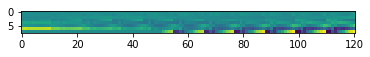

In [10]:
# PCA for all the images 

Y = image2DLong

from sklearn.decomposition import PCA

tholdPCA = 0.995

pca = PCA()
pca.fit(Y)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= tholdPCA) + 1

print('Selected principal space dimensions = ', d)

pca = PCA(n_components=d)
Y_reduced = pca.fit_transform(Y)

pca.n_components_
print('explained_variance_ratio', np.sum(pca.explained_variance_ratio_))

# reconstructed PCA-compressed images
Y_recovered = pca.inverse_transform(Y_reduced)

print('shape of reduced all image data', Y_reduced.shape)
print('shape of reduced all recovered image data',Y_recovered.shape)

implt(Y_reduced)

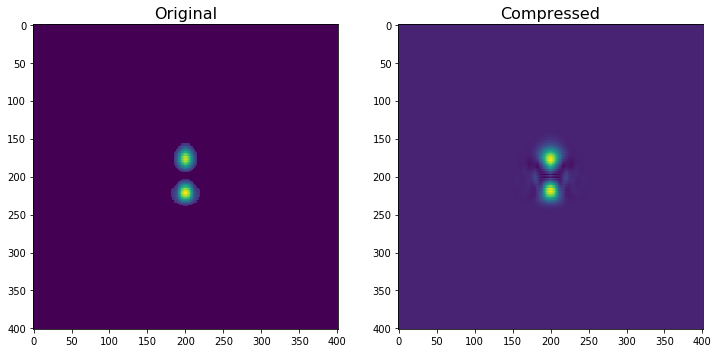

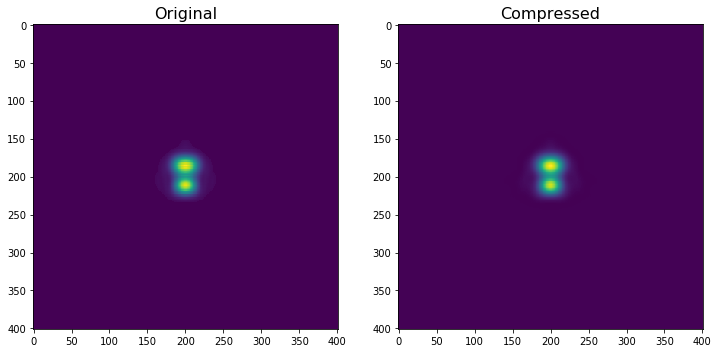

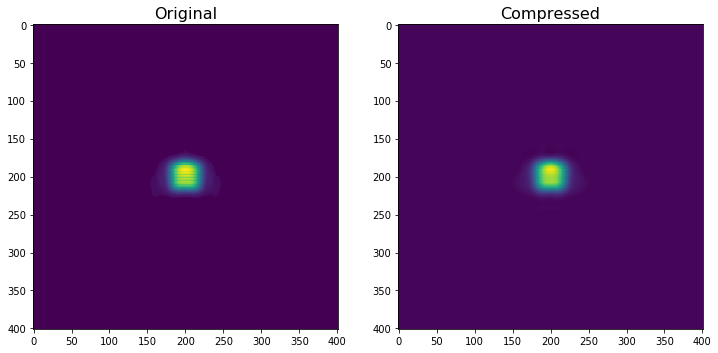

In [11]:
implt2(Y,Y_recovered,10)
implt2(Y,Y_recovered,60)
implt2(Y,Y_recovered,90)

In [12]:
############## Data Normalization and train-test split 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

Ynorm = Y_reduced

#dfXnorm = dfX.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
Xnorm= X

Xnorm_train, Xnorm_test, Y3norm_train, Y3norm_test = train_test_split(Xnorm, Ynorm, test_size=0.01, random_state=0)
print(Xnorm_train.shape)
print(Xnorm_test.shape)
print(Y3norm_train.shape)
print(Y3norm_test.shape)

#Xnorm_train

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(119, 2)
(2, 2)
(119, 8)
(2, 8)


In [13]:
directory = 'imageNN'


import os, errno

try:
    os.makedirs(directory)
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
def NNpredcheck(x,y):

    Yt1 = model.predict(np.array([[x, y]]))
    Yt1recover = pca.inverse_transform(Yt1).reshape(401,401)
    plt.imshow(ndimage.rotate(Yt1recover,90))
    titlename = 'x = %d y = %d' % (x,y)
    plt.title(titlename)
    plt.show()
    
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

In [14]:
kMatrix = [10,20,30,40,50,100,200,500,800,1000,1200,1500,2000]
#kMatrix = [110,120,130,140,150]
denseperMatrix = [0,0.1,0.2,0.3,0.4,0.5]
#actstr = keras.layers.ELU(alpha=1.0)
#actstr = keras.layers.LeakyReLU(alpha=0.3)
#actstr = keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
actstr = 'relu'
actstrName = 'Relu'

for denseper in denseperMatrix:
    for k in kMatrix:

        def create_model(d,k):
            model = Sequential()

            #odel.add(Dense(1000, activation='relu', input_shape=(2,)))
            model.add(Dense(k, activation=actstr, input_shape=(2,)))
            model.add(Dropout(denseper))
            model.add(Dense(k, activation=actstr))
            model.add(Dropout(denseper))
            model.add(Dense(k, activation=actstr))
            model.add(Dropout(denseper))
            model.add(Dense(k, activation=actstr))
            model.add(Dropout(denseper))
            model.add(Dense(k, activation=actstr))
            model.add(Dropout(denseper))
            model.add(Dense(k, activation=actstr))
            model.add(Dropout(denseper))
            model.add(Dense(k, activation=actstr))
            model.add(Dropout(denseper))
            model.add(Dense(k, activation=actstr))
            model.add(Dropout(denseper))
            model.add(Dense(k, activation=actstr))
            model.add(Dropout(denseper))
            model.add(Dense(k, activation=actstr))
            model.add(Dropout(denseper))
            #model.add(Dense(10000, activation='relu'))
            #model.add(Dense(k, activation=actstr))
            ##model.add(Dropout(denseper))
            #model.add(Dense(140, activation='relu'))
            #model.add(Dense(k, activation=actstr))
            ##model.add(Dropout(denseper))
            model.add(Dense(d))
            return model

        model = create_model(d,k)
        model.summary()
        model.compile(loss='mse',
                      optimizer=RMSprop(),
                      metrics=['accuracy'])
        #mse
        #categorical_crossentropy
        history = model.fit(Xnorm_train, Y3norm_train,
                            batch_size=12,
                            epochs=10,
                            verbose=0,
                            validation_data=(Xnorm_test, Y3norm_test))





        Xtest = np.array([[10,6],[20,10],[20,30],[40,40]])


        Yt0 = model.predict(Xnorm_test[0,:].reshape(1,-1))
        Y0original = pca.inverse_transform(Y3norm_test[0,:]).reshape(401,401)
        Yt0recover = pca.inverse_transform(Yt0).reshape(401,401)

        Yt1= model.predict(Xnorm_test[1,:].reshape(1,-1))
        Y1original = pca.inverse_transform(Y3norm_test[1,:]).reshape(401,401)
        Yt1ecover = pca.inverse_transform(Yt1).reshape(401,401)

        Ytestlong = np.zeros((1,401*401))

        for i in range(len(Xtest)):
            Ytest = model.predict(Xtest[i,:].reshape(1,-1))
            Yt1recover = pca.inverse_transform(Ytest) 
            Ytestlong = np.append(Ytestlong,Yt1recover,axis=0) 

        Ytest = Ytestlong[1:,:]



        plt.figure(figsize=(12, 22))

        subrows=4;
        subcols=2;

        ax1 = plt.subplot(subrows,subcols,1)
        ax1.imshow(ndimage.rotate(Y0original,90))
        plt.title("number of neurons %d Original %d mm, %d mm" % (k,Xnorm_test[0,0],Xnorm_test[0,1]), fontsize=16)
        ax2 = plt.subplot(subrows,subcols,2)
        ax2.imshow(ndimage.rotate(Yt0recover,90))
        plt.title("Generated Dx = %d mm   Dy= %d mm" % (Xnorm_test[0,0],Xnorm_test[0,1]), fontsize=16)

        ax3 = plt.subplot(subrows,subcols,1+subcols)
        ax3.imshow(ndimage.rotate(Y1original,90))
        plt.title("Original Dx = %d mm   Dy= %d mm" % (Xnorm_test[1,0],Xnorm_test[1,1]), fontsize=16)
        ax2 = plt.subplot(subrows,subcols,2+subcols)
        ax2.imshow(ndimage.rotate(Yt1ecover,90))
        plt.title("Generated Dx = %d mm   Dy= %d mm" % (Xnorm_test[1,0],Xnorm_test[1,1]), fontsize=16)



        ax3 = plt.subplot(subrows,subcols,1+2*subcols)
        ax3.imshow(ndimage.rotate(Ytest[0,:].reshape(401,401),90))
        plt.title("Generated Dx = %d mm   Dy= %d mm" % (Xtest[0,0],Xtest[0,1]), fontsize=16)

        ax4 = plt.subplot(subrows,subcols,2+2*subcols)
        ax4.imshow(ndimage.rotate(Ytest[1,:].reshape(401,401),90))
        plt.title("Generated Dx = %d mm   Dy= %d mm" % (Xtest[1,0],Xtest[1,1]), fontsize=16)

        ax5 = plt.subplot(subrows,subcols,1+3*subcols)
        ax5.imshow(ndimage.rotate(Ytest[2,:].reshape(401,401),90))
        plt.title("Generated Dx = %d mm   Dy= %d mm" % (Xtest[2,0],Xtest[2,1]), fontsize=16)

        ax6= plt.subplot(subrows,subcols,2+3*subcols)
        ax6.imshow(ndimage.rotate(Ytest[3:].reshape(401,401),90))
        plt.title("Generated Dx = %d mm   Dy= %d mm" % (Xtest[3,0],Xtest[3,1]), fontsize=16)

        imagfilename = '/home/j2/Desktop/PythonTry/MLshm/imageNN/drop%d%s11layerNrons%d.png' % (denseper*100,actstrName,k)
        plt.savefig(imagfilename, format='png', dpi=300)
        plt.close()
        #plt.show()
        #path = "%s%s" % (directory, '/test.png')
      










# indexnumber = 1
# for irad in range(2):
#     indexnumber = irad
#     #print('index number is =', indexnumber)
#     print('width and length = ', Xnorm_test[indexnumber,:].reshape(1,-1) )
#     print('predicted = ', model.predict(Xnorm_test[indexnumber,:].reshape(1,-1) ))
#     print('labeled = ', Y3norm_test[indexnumber,:])
#     print('Ratio = ', model.predict(Xnorm_test[indexnumber,:].reshape(1,-1) )/Y3norm_test[indexnumber,:])
    
# for i in range(2):
#     Yt1 = model.predict(Xnorm_test[i,:].reshape(1,-1))
#     Yt1recover = pca.inverse_transform(Yt1)
#     implt3(Y,Yt1recover,Xnorm_test[i,:][0],Xnorm_test[i,:][1])
#     path = "%s%s%d" % (directory, '/test',i)
#     #plt.savefig(path, format='png', dpi=300)
        
# NNpredcheck(10,6)
# NNpredcheck(20,10)
# NNpredcheck(20,30)
# NNpredcheck(40,40)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 40)                120       
_________________________________________________________________
dropout_31 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_32 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_33 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 40)                1640      
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 200)               600       
_________________________________________________________________
dropout_61 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_62 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_63 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 200)               40200     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 1000)              3000      
_________________________________________________________________
dropout_91 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_101 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dropout_92 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_102 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dropout_93 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_103 (Dense)            (None, 1000)              1001000   
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 2000)              6000      
_________________________________________________________________
dropout_121 (Dropout)        (None, 2000)              0         
_________________________________________________________________
dense_134 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dropout_122 (Dropout)        (None, 2000)              0         
_________________________________________________________________
dense_135 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dropout_123 (Dropout)        (None, 2000)              0         
_________________________________________________________________
dense_136 (Dense)            (None, 2000)              4002000   
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 30)                90        
_________________________________________________________________
dropout_151 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 30)                930       
_________________________________________________________________
dropout_152 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_168 (Dense)            (None, 30)                930       
_________________________________________________________________
dropout_153 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_169 (Dense)            (None, 30)                930       
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 100)               300       
_________________________________________________________________
dropout_181 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_200 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_182 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_201 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_183 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_202 (Dense)            (None, 100)               10100     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 800)               2400      
_________________________________________________________________
dropout_211 (Dropout)        (None, 800)               0         
_________________________________________________________________
dense_233 (Dense)            (None, 800)               640800    
_________________________________________________________________
dropout_212 (Dropout)        (None, 800)               0         
_________________________________________________________________
dense_234 (Dense)            (None, 800)               640800    
_________________________________________________________________
dropout_213 (Dropout)        (None, 800)               0         
_________________________________________________________________
dense_235 (Dense)            (None, 800)               640800    
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_265 (Dense)            (None, 1500)              4500      
_________________________________________________________________
dropout_241 (Dropout)        (None, 1500)              0         
_________________________________________________________________
dense_266 (Dense)            (None, 1500)              2251500   
_________________________________________________________________
dropout_242 (Dropout)        (None, 1500)              0         
_________________________________________________________________
dense_267 (Dense)            (None, 1500)              2251500   
_________________________________________________________________
dropout_243 (Dropout)        (None, 1500)              0         
_________________________________________________________________
dense_268 (Dense)            (None, 1500)              2251500   
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_298 (Dense)            (None, 20)                60        
_________________________________________________________________
dropout_271 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_299 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_272 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_300 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_273 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_301 (Dense)            (None, 20)                420       
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_331 (Dense)            (None, 50)                150       
_________________________________________________________________
dropout_301 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_332 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_302 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_333 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_303 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_334 (Dense)            (None, 50)                2550      
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_364 (Dense)            (None, 500)               1500      
_________________________________________________________________
dropout_331 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_365 (Dense)            (None, 500)               250500    
_________________________________________________________________
dropout_332 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_366 (Dense)            (None, 500)               250500    
_________________________________________________________________
dropout_333 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_367 (Dense)            (None, 500)               250500    
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_397 (Dense)            (None, 1200)              3600      
_________________________________________________________________
dropout_361 (Dropout)        (None, 1200)              0         
_________________________________________________________________
dense_398 (Dense)            (None, 1200)              1441200   
_________________________________________________________________
dropout_362 (Dropout)        (None, 1200)              0         
_________________________________________________________________
dense_399 (Dense)            (None, 1200)              1441200   
_________________________________________________________________
dropout_363 (Dropout)        (None, 1200)              0         
_________________________________________________________________
dense_400 (Dense)            (None, 1200)              1441200   
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_430 (Dense)            (None, 10)                30        
_________________________________________________________________
dropout_391 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_431 (Dense)            (None, 10)                110       
_________________________________________________________________
dropout_392 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_432 (Dense)            (None, 10)                110       
_________________________________________________________________
dropout_393 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_433 (Dense)            (None, 10)                110       
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_463 (Dense)            (None, 40)                120       
_________________________________________________________________
dropout_421 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_464 (Dense)            (None, 40)                1640      
_________________________________________________________________
dropout_422 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_465 (Dense)            (None, 40)                1640      
_________________________________________________________________
dropout_423 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_466 (Dense)            (None, 40)                1640      
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_496 (Dense)            (None, 200)               600       
_________________________________________________________________
dropout_451 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_497 (Dense)            (None, 200)               40200     
_________________________________________________________________
dropout_452 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_498 (Dense)            (None, 200)               40200     
_________________________________________________________________
dropout_453 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_499 (Dense)            (None, 200)               40200     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_529 (Dense)            (None, 1000)              3000      
_________________________________________________________________
dropout_481 (Dropout)        (None, 1000)              0         
_________________________________________________________________
dense_530 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dropout_482 (Dropout)        (None, 1000)              0         
_________________________________________________________________
dense_531 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dropout_483 (Dropout)        (None, 1000)              0         
_________________________________________________________________
dense_532 (Dense)            (None, 1000)              1001000   
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_562 (Dense)            (None, 2000)              6000      
_________________________________________________________________
dropout_511 (Dropout)        (None, 2000)              0         
_________________________________________________________________
dense_563 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dropout_512 (Dropout)        (None, 2000)              0         
_________________________________________________________________
dense_564 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dropout_513 (Dropout)        (None, 2000)              0         
_________________________________________________________________
dense_565 (Dense)            (None, 2000)              4002000   
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_595 (Dense)            (None, 30)                90        
_________________________________________________________________
dropout_541 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_596 (Dense)            (None, 30)                930       
_________________________________________________________________
dropout_542 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_597 (Dense)            (None, 30)                930       
_________________________________________________________________
dropout_543 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_598 (Dense)            (None, 30)                930       
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_628 (Dense)            (None, 100)               300       
_________________________________________________________________
dropout_571 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_629 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_572 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_630 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_573 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_631 (Dense)            (None, 100)               10100     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_661 (Dense)            (None, 800)               2400      
_________________________________________________________________
dropout_601 (Dropout)        (None, 800)               0         
_________________________________________________________________
dense_662 (Dense)            (None, 800)               640800    
_________________________________________________________________
dropout_602 (Dropout)        (None, 800)               0         
_________________________________________________________________
dense_663 (Dense)            (None, 800)               640800    
_________________________________________________________________
dropout_603 (Dropout)        (None, 800)               0         
_________________________________________________________________
dense_664 (Dense)            (None, 800)               640800    
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_694 (Dense)            (None, 1500)              4500      
_________________________________________________________________
dropout_631 (Dropout)        (None, 1500)              0         
_________________________________________________________________
dense_695 (Dense)            (None, 1500)              2251500   
_________________________________________________________________
dropout_632 (Dropout)        (None, 1500)              0         
_________________________________________________________________
dense_696 (Dense)            (None, 1500)              2251500   
_________________________________________________________________
dropout_633 (Dropout)        (None, 1500)              0         
_________________________________________________________________
dense_697 (Dense)            (None, 1500)              2251500   
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_727 (Dense)            (None, 20)                60        
_________________________________________________________________
dropout_661 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_728 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_662 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_729 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_663 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_730 (Dense)            (None, 20)                420       
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_760 (Dense)            (None, 50)                150       
_________________________________________________________________
dropout_691 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_761 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_692 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_762 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_693 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_763 (Dense)            (None, 50)                2550      
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_793 (Dense)            (None, 500)               1500      
_________________________________________________________________
dropout_721 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_794 (Dense)            (None, 500)               250500    
_________________________________________________________________
dropout_722 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_795 (Dense)            (None, 500)               250500    
_________________________________________________________________
dropout_723 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_796 (Dense)            (None, 500)               250500    
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_826 (Dense)            (None, 1200)              3600      
_________________________________________________________________
dropout_751 (Dropout)        (None, 1200)              0         
_________________________________________________________________
dense_827 (Dense)            (None, 1200)              1441200   
_________________________________________________________________
dropout_752 (Dropout)        (None, 1200)              0         
_________________________________________________________________
dense_828 (Dense)            (None, 1200)              1441200   
_________________________________________________________________
dropout_753 (Dropout)        (None, 1200)              0         
_________________________________________________________________
dense_829 (Dense)            (None, 1200)              1441200   
__________